In [4]:
import polars as pl
import numpy as np
import statsmodels.api as sm

# 读取数据
data = pl.read_parquet("daily_data.pa")

df = data.sort('open_time').sort("symbol")

x1 = 10
x2 = 10
x3 = 55

df = df.with_columns([
    (pl.col('close') / (pl.col('close').shift(1).over('symbol')) - 1).alias('return'),
    pl.col('open').rolling_sum(x1).over('symbol').alias('open_sum')
])

df = df.with_columns([
    pl.col('return').rolling_sum(x2).over('symbol').alias('return_sum')
])

df = df.with_columns([
    (-1 * pl.col('open_sum') * pl.col('return_sum') - (pl.col('open_sum').shift(x3).over('symbol'))).alias('test')
])

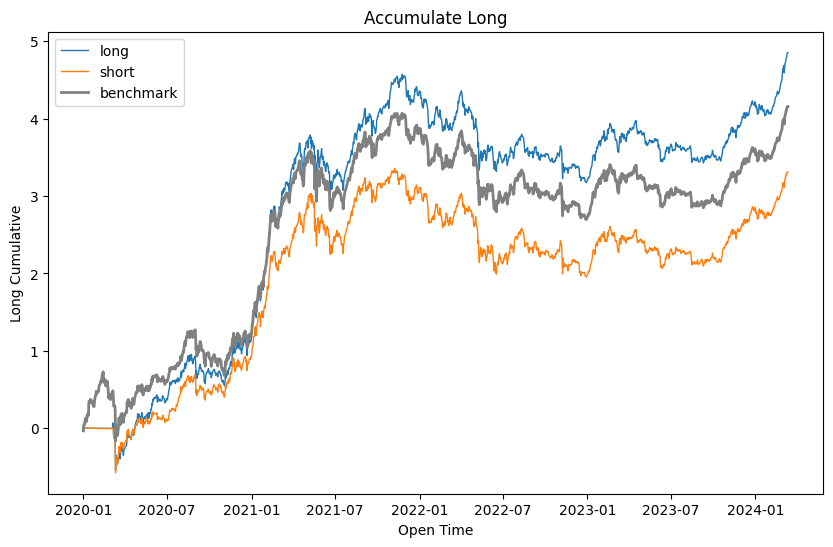

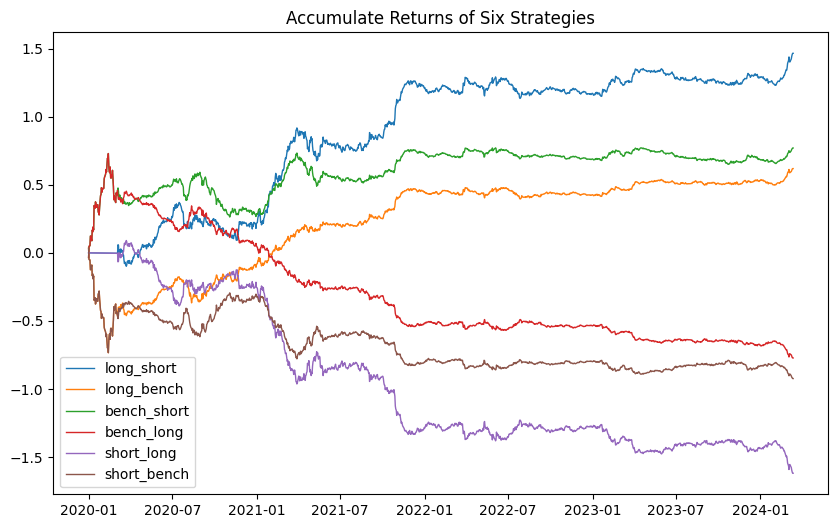

long: 
ann_return = 27.7179  sharpe = 6.0186  maxdd = 0.5712  calmar_ratio = 48.5256  

short: 
ann_return = 18.9078  sharpe = 4.4147  maxdd = 0.5768  calmar_ratio = 32.7793  

bench: 
ann_return = 23.7448  sharpe = 5.2089  maxdd = 0.5174  calmar_ratio = 45.8928  

long_short: 
ann_return = 8.372  sharpe = 6.5707  maxdd = 0.2032  calmar_ratio = 41.2101  

long_bench: 
ann_return = 3.535  sharpe = 3.1295  maxdd = 0.7421  calmar_ratio = 4.7636  

bench_long: 
ann_return = -4.411  sharpe = -3.905  maxdd = 0.8681  calmar_ratio = -5.0813  

short_long: 
ann_return = -9.248  sharpe = -7.2582  maxdd = 1.5672  calmar_ratio = -5.9012  

short_bench: 
ann_return = -5.275  sharpe = -4.4907  maxdd = 0.9257  calmar_ratio = -5.6987  

bench_short: 
ann_return = 4.399  sharpe = 3.7449  maxdd = 0.2695  calmar_ratio = 16.3252  



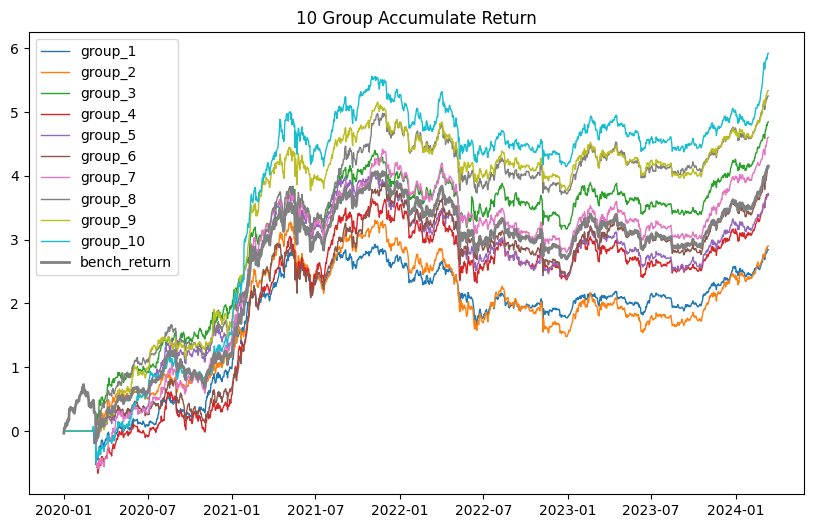

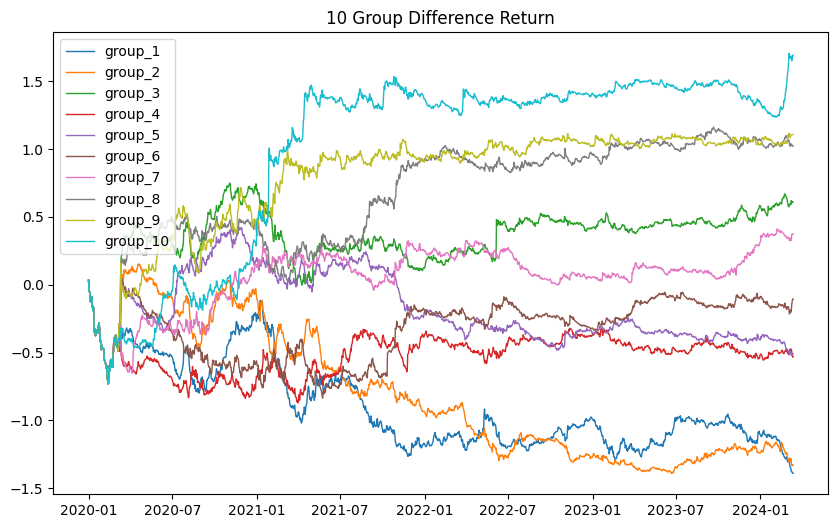

group_1: 
ann_return = 16.2425  sharpe = 4.2405  maxdd = 0.5311  calmar_ratio = 30.5843  

group_2: 
ann_return = 16.5908  sharpe = 3.89  maxdd = 0.4246  calmar_ratio = 39.0786  

group_3: 
ann_return = 27.683  sharpe = 6.1408  maxdd = 0.2286  calmar_ratio = 121.1197  

group_4: 
ann_return = 21.1396  sharpe = 4.4341  maxdd = 0.6624  calmar_ratio = 31.9126  

group_5: 
ann_return = 21.2794  sharpe = 4.6389  maxdd = 0.3267  calmar_ratio = 65.1429  

group_6: 
ann_return = 23.581  sharpe = 4.9998  maxdd = 0.3747  calmar_ratio = 62.9365  

group_7: 
ann_return = 26.3129  sharpe = 5.547  maxdd = 0.5967  calmar_ratio = 44.0949  

group_8: 
ann_return = 30.0185  sharpe = 6.4932  maxdd = 0.2122  calmar_ratio = 141.4799  

group_9: 
ann_return = 30.5109  sharpe = 6.5922  maxdd = 0.2255  calmar_ratio = 135.2905  

group_10: 
ann_return = 33.8467  sharpe = 6.7242  maxdd = 0.5172  calmar_ratio = 65.4484  

-----------------------------------------
group_difference_1: 
ann_return = -7.9403  sharpe

In [5]:
factors = df.select(['open_time', 'symbol', 'test'])

from factor_analysis.factor_analysis import FactorAnalysis

# 使用示例
analysis = FactorAnalysis(factors, data)
analysis.run_full_analysis()